[0.51668862 0.95724724 0.72099625 0.01031905 0.86510212 0.86782502
 0.52789141 0.46370278 0.23791292 0.73075442]


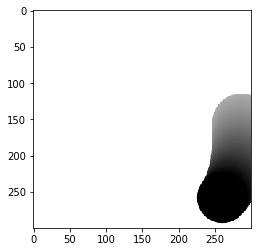

In [1]:
%matplotlib inline

import numpy as np
import cv2
import scipy.misc
from PIL import Image
import matplotlib.pyplot as plt

from Renderer.stroke_gen import draw

f = np.random.uniform(0, 1, 10)
print(f)
im = draw(f, 300)

plt.imshow(im, cmap='gray')

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]]


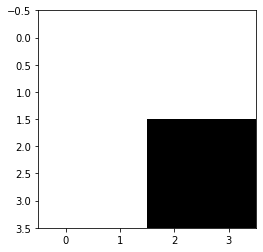

In [2]:
from PIL import Image, ImageDraw
from Renderer.stroke_gen import draw_rect

# width = 3
# im = Image.new('F', (width, width))

# draw = ImageDraw.Draw(im)
# # draw.line((0, 0) + im.size, fill=128)
# # draw.line((0, im.size[1], im.size[0], 0), fill=128)
# draw.rectangle([1, 1, 2, 2], fill=1)
# # plt.imshow(np.array(im), cmap='gray')
# plt.imshow(im, vmin=0, vmax=1)

im = draw_rect([0.5, 0.5, 1, 1], width=4)
# plt.imshow(im, vmin=0, vmax=1)
plt.imshow(1-im, cmap='gray')
print(im)

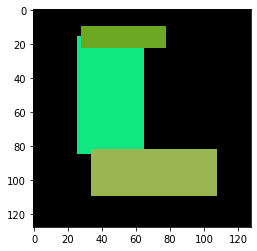

In [3]:
def rand_draw(draw_fn=draw_rect, n_strokes=3, width=128):
    canvas = np.zeros((width, width, 3), dtype=int)
    for i in range(n_strokes):
        x = np.random.rand(4)
        stroke = draw_fn(x, width)
        stroke = np.repeat(stroke, 3).reshape(width, width, 3).astype(int)
        color = np.random.randint(255, size=(3))
        canvas = canvas * (1 - stroke) + stroke * color
    return canvas

plt.imshow(rand_draw())
# plt.imshow(1-im, cmap='gray')

In [4]:
import torch
from Renderer.model import FCN

action_dim = 4

stroke_net = FCN(num_input=action_dim)
stroke_net.load_state_dict(torch.load("../renderer.pkl"))

# x = torch.rand(1, action_dim)

print(draw_rect([0, 0, 0.5, 0.5]))
x = torch.from_numpy(np.array([[0, 0, 0.5, 0.5]], dtype=np.float32))
print(x.shape)
# x = np.random.rand(action_dim)
stroke_net(x)

[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
torch.Size([1, 4])


tensor([[[0.4814, 0.5122, 0.4826,  ..., 0.5142, 0.4769, 0.5145],
         [0.4990, 0.4765, 0.4986,  ..., 0.4764, 0.5006, 0.4712],
         [0.4819, 0.5128, 0.4805,  ..., 0.5145, 0.4696, 0.5187],
         ...,
         [0.4925, 0.4770, 0.4874,  ..., 0.4768, 0.4929, 0.4663],
         [0.4892, 0.5084, 0.4898,  ..., 0.5068, 0.4751, 0.5088],
         [0.4923, 0.4687, 0.4823,  ..., 0.4666, 0.4885, 0.4667]]],
       grad_fn=<RsubBackward1>)

finish loading data, 8 training images, 2 testing images


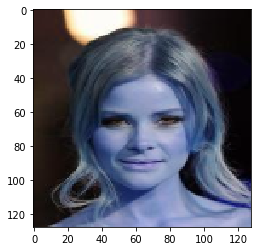

In [26]:
from env import Paint

env = Paint(1, 3)
env.load_data()
obs = env.reset()
obs = env.reset_with_gen()

# print(obs[0, 3:6])
im = np.array(obs[0, 3:6])
plt.imshow(np.transpose(im, (1, 2, 0)))


In [6]:
import torch
from DRL.ddpg import decode

width = 3

canvas = torch.rand(1,3,width,width)# [B x 3 x width x width]

_action = torch.rand(1, 4)
color = torch.rand(1, 3)
action = torch.cat((_action, color), 1)

canvas_out =  decode(action, canvas, width)
im = canvas_out.squeeze(0).detach().numpy()
im = np.transpose(im, (1, 2, 0))
# canvas = decode(action, canvas)
plt.imshow(im, vmin=0, vmax=1)

RuntimeError: shape '[-1, 3, 3, 1]' is invalid for input of size 16384

In [ ]:
import os
import numpy as np
import torch
from Renderer.model import FCN

action_dim = 4

Decoder = FCN(num_input=action_dim)
Decoder.load_state_dict(torch.load("../renderer.pkl"))
# Decoder()
x = torch.Tensor(np.random.rand(480, 4))
Decoder(x).shape